# Problem Statement
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("ESSdata_Thinkful.csv")
df = df.fillna(df.median())
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
print("Shape of data",df.shape)
print("Number of unique countries")
print(df['cntry'].value_counts())

Shape of data (8594, 13)
Number of unique countries
ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64


From the codebook:
<br>year(6) = 2012
<br>gndr(1) = Male
<br>partner(1) = Lives with husband/wife/partner
<br>cntry: ES = Spain, SE = Sweden, CH = Switzerland, NO = Norway, CZ = Czech Republic, DE = Germany

# 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample

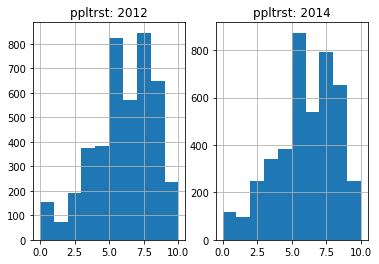

In [4]:
df_2012 = df[df['year'] == 6]
fig, ax = plt.subplots(1,2)
df_2012['ppltrst'].hist(ax=ax[0])
ax[0].set_title('ppltrst: 2012')
df_2014 = df[df['year'] == 7]
df_2014['ppltrst'].hist(ax=ax[1])
ax[1].set_title('ppltrst: 2014')
plt.show()

In [5]:
# is there a difference in trust from 2012 to 2014
stats.ttest_rel(df_2012['ppltrst'],df_2014['ppltrst'])

Ttest_relResult(statistic=0.1513281783069418, pvalue=0.8797239474781275)

In [6]:
# for each country?
countries = list(df['cntry'].value_counts().index)
for country in countries:
    df_c_2012 = df_2012[df_2012['cntry'] == country]
    df_c_2014 = df_2014[df_2014['cntry'] == country]
    print(country)
    print(stats.ttest_rel(df_c_2012['ppltrst'],df_c_2014['ppltrst']),"\n")

ES
Ttest_relResult(statistic=2.4654605168309875, pvalue=0.013821475296285565) 

SE
Ttest_relResult(statistic=-2.077952635366614, pvalue=0.037994493452976834) 

CH
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135) 

NO
Ttest_relResult(statistic=0.536083058309722, pvalue=0.5920644526109955) 

CZ
Ttest_relResult(statistic=-0.3505247744198508, pvalue=0.7260572552300646) 

DE
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805) 



### Results
Although the distributions between 2012 and 2014 look very similar, the groups show varying results from the t-test. Here we see that there is a statistically significant difference between the trust of people in Spain (ES) and Sweden (SE). However, the rest of the countries did not show the same trend.

# 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

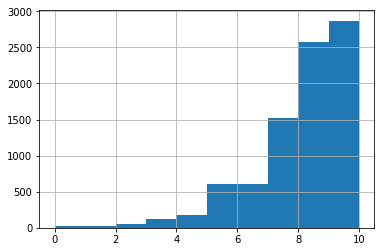

In [7]:
df['happy'].hist()
plt.show()

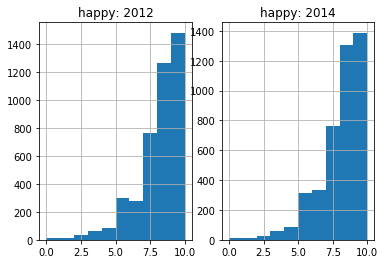

In [8]:
fig, ax = plt.subplots(1,2)
df_2012['happy'].hist(ax=ax[0])
ax[0].set_title('happy: 2012')
df_2014['happy'].hist(ax=ax[1])
ax[1].set_title('happy: 2014')
plt.show()

In [9]:
# is there a difference in trust from 2012 to 2014
stats.wilcoxon(df_2012['happy'],df_2014['happy'])

WilcoxonResult(statistic=2936643.0, pvalue=0.034305851328279506)

In [10]:
# for each country
countries = list(df['cntry'].value_counts().index)
for country in countries:
    df_c_2012 = df_2012[df_2012['cntry'] == country]
    df_c_2014 = df_2014[df_2014['cntry'] == country]
    print(country)
    print(stats.wilcoxon(df_c_2012['happy'],df_c_2014['happy']),"\n")

ES
WilcoxonResult(statistic=232720.5, pvalue=0.059772872562481524) 

SE
WilcoxonResult(statistic=126465.0, pvalue=0.682451144037987) 

CH
WilcoxonResult(statistic=93384.0, pvalue=0.9248463130390704) 

NO
WilcoxonResult(statistic=68546.0, pvalue=1.1346429849504098e-05) 

CZ
WilcoxonResult(statistic=78000.5, pvalue=0.2829630838149413) 

DE
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508) 



### Results
Given all of the data, no significant change in happiness occurs between 2012 and 2014.
Only Norway (NO) exhibits a statistically significant Wilcoxon value, meaning there is a difference in happiness between 2012 and 2014 for Norway alone.

# 3. Who reported watching more TV in 2012, men or women?

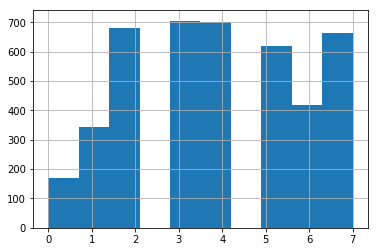

In [11]:
df_2012['tvtot'].hist()
plt.show()

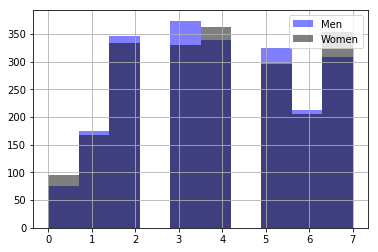

In [37]:
df_2012[df_2012['gndr'] == 1]['tvtot'].hist(alpha=.5,label="Men",color='b')
df_2012[df_2012['gndr'] == 2]['tvtot'].hist(alpha=.5,label="Women",color='k')
plt.legend()
plt.show()

In [38]:
stats.ttest_ind(df_2012[df_2012['gndr'] == 1]['tvtot'],df_2012[df_2012['gndr'] == 2]['tvtot'])

Ttest_indResult(statistic=-0.6900012172591534, pvalue=0.49023070220255527)

### Results
When split into two groups, the amount of tv watched between men and women is almost indistinguishable. However, on average women watch more tv.

# 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

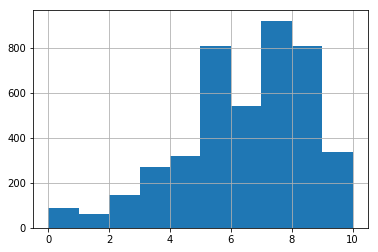

In [14]:
df_2012['pplfair'].hist()
plt.show()

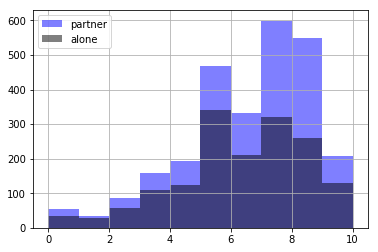

In [40]:
df_2012[df_2012['partner']==1]['pplfair'].hist(alpha=.5,label="partner",color='b')
df_2012[df_2012['partner']==2]['pplfair'].hist(alpha=.5,label="alone",color='k')
plt.legend()
plt.show()

In [16]:
stats.ttest_ind(df_2012[df_2012['partner']==1]['pplfair'],df_2012[df_2012['partner']==2]['pplfair'])

Ttest_indResult(statistic=3.3526650393131754, pvalue=0.0008073002028865902)

### Results
Although the distributions of those living alone and with a partner appear similar in shape, the t-test indicates that people who live with a partner are more likely to think people are fair.

# 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

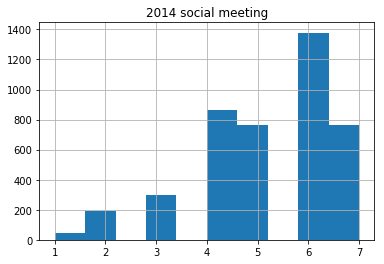

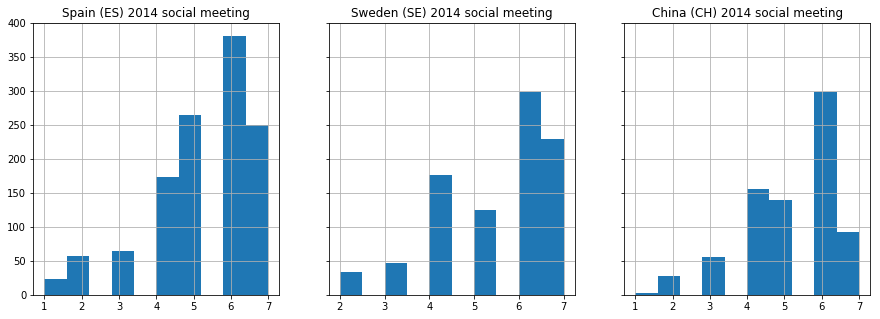

In [32]:
df_2014['sclmeet'].hist()
plt.title("2014 social meeting")
plt.show()
df_es_2014 = df_2014[df_2014['cntry']=='ES']
df_se_2014 = df_2014[df_2014['cntry']=='SE']
df_ch_2014 = df_2014[df_2014['cntry']=='CH']
fig,ax = plt.subplots(1,3,sharey=True,figsize=(15,5))
df_es_2014['sclmeet'].hist(ax=ax[0])
ax[0].set_title("Spain (ES) 2014 social meeting")
df_se_2014['sclmeet'].hist(ax=ax[1])
ax[1].set_title("Sweden (SE) 2014 social meeting")
df_ch_2014['sclmeet'].hist(ax=ax[2])
ax[2].set_title("Switzerland (CH) 2014 social meeting")
plt.show()


In [35]:
#test for differences
stat, p, med, tbl = stats.median_test(df_es_2014['sclmeet'],df_se_2014['sclmeet'],df_ch_2014['sclmeet'])
print("test statistic",stat)
print("p-value",p)

test statistic 46.74125433519566
p-value 7.08378844244659e-11


### Results
Between our 3 countries there is at least one which differs from the rest given the low p-value for the median test. 

# 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

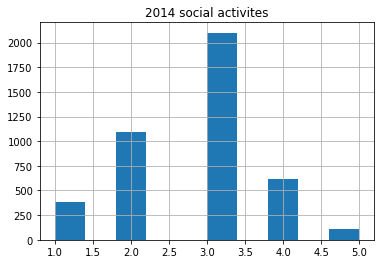

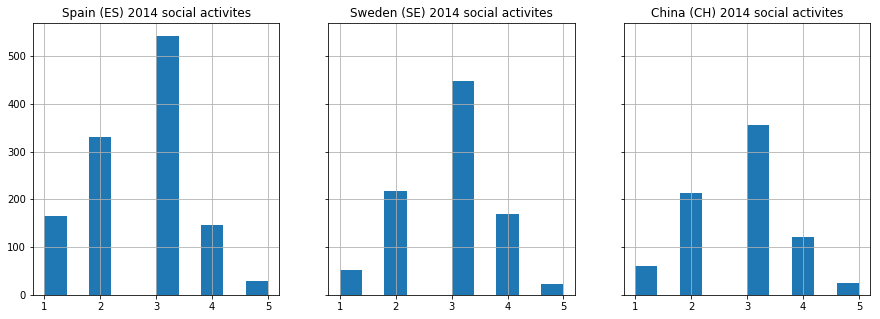

In [33]:
df_2014['sclact'].hist()
plt.title("2014 social activites")
plt.show()
fig,ax = plt.subplots(1,3,sharey=True,figsize=(15,5))
df_es_2014['sclact'].hist(ax=ax[0])
ax[0].set_title("Spain (ES) 2014 social activites")
df_se_2014['sclact'].hist(ax=ax[1])
ax[1].set_title("Sweden (SE) 2014 social activites")
df_ch_2014['sclact'].hist(ax=ax[2])
ax[2].set_title("Switzerland (CH) 2014 social activites")
plt.show()

In [36]:
# test for difference
stats.f_oneway(df_es_2014['sclact'],df_se_2014['sclact'],df_ch_2014['sclact'])

F_onewayResult(statistic=21.163454957801243, pvalue=7.506929083444684e-10)

### Results
The results of the One way ANOVA show that one group is not like the others.